In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## making dataset

In [213]:
m=23
X_train=np.array([1,3,4,6,7,9,11,12,13,14,15,16,18,19,20,21,23,24,25,26,27,29,30]) 
X_test=np.array([2,5,8,10,17,22,28])

def f(x):
    return 4*(x**2)+3*x+2

y_train= []

for i in X_train:
    y_train.append(f(i))

y_test= []

for i in X_test:
    y_test.append(f(i))

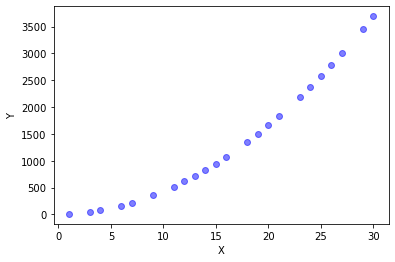

In [214]:
plt.scatter(X_train,y_train, c= 'blue', alpha=.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## adding noise

In [215]:
mu, sigma= 0, 0.4
noise= np.random.normal(mu, sigma, [23])

for j in range(23):
    y_train[j]= y_train[j]+noise[j]

y_train=np.array(y_train)

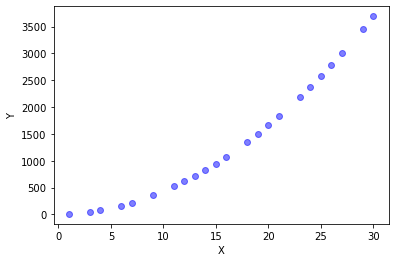

In [216]:
plt.scatter(X_train,y_train, c= 'blue', alpha=.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## regression

In [217]:
def h(X,w):
    return (w[2]*(np.array(X[:])**2)+w[1]*np.array(X[:])+w[0])

In [218]:
def cost_4(w,X,y):
    return (0.25/m) * np.sum(abs((h(X,w)-np.array(y))**4))

In [219]:
def grad_4(w,X,y):
    g = [0]*3
    g[0] =(1/m) *np.sum((h(X,w)-np.array(y))**3)
    g[1] = (1/m) * np.sum(((h(X,w)-np.array(y))**3)*np.array(X[:]))
    g[2] = (1/m) * np.sum(((h(X,w)-np.array(y))**3)*((np.array(X[:])**2)))
    return g

In [220]:
def gradient_descent(w_new, w_prev, lr):
    j=0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad_4(w_prev,X_train,y_train)[0]
        w1 = w_prev[1] - lr*grad_4(w_prev,X_train,y_train)[1]
        w2 = w_prev[2] - lr*grad_4(w_prev,X_train,y_train)[2]
        w_new = [w0, w1, w2]
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 + (w_new[2]-w_prev[2])**2 <= pow(10,-5):
            return w_new
        if j>200: 
            return w_new
        j+=1

In [221]:
w = [1,2,3]

In [222]:
w = gradient_descent(w,w,0.0000000000001)

## making graph

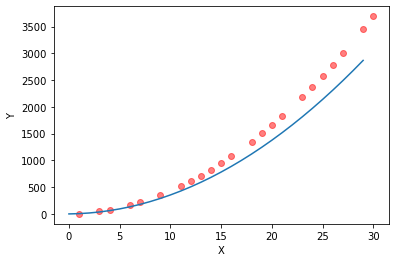

In [223]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return w[0]+w[1]*x+ w[2]*(x**2)

plt.scatter(X_train,y_train, c = "red",alpha=.5, marker = 'o')
graph(my_formula, range(0,30))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [224]:
y_pred=[]

for i in X_test:
    y_pred.append(my_formula(i))

## calculating error

In [225]:
def rmse(y_true, y_pred):
    t=0
    for i in y_true:
        t+=1
    sum=0
    for i in range(t):
        sum= (y_true[i]-y_pred[i])**2
    sum=sum/t
    return math.sqrt(sum)

In [226]:
rmse(y_test, y_pred)

206.71740159671597